In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
input_dict = {'A': 0, 'C': 1, 'D': 2, 'E': 3, 'END': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12,
 'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18, 'W': 19, 'Y': 20}

placeholder_index = 4

In [ ]:
y_train = pd.read_table('Data/20201230_all5_ytrain.txt', sep=' ', header=None)
y_train.head(10)

In [ ]:
x_train.shape, y_train.shape

In [1]:
import tensorflow as tf
from tensorflow import keras
#import keras_tuner as kt
from hyperopt import Trials, STATUS_OK, tpe
from hyperas.distributions import choice, uniform

2024-08-11 23:23:49.737075: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-11 23:23:49.775392: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-11 23:23:49.923317: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-11 23:23:49.923393: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-11 23:23:49.934476: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [ ]:
def model_builder(hp):

    model = keras.models.Sequential([
        keras.layers.Input(shape=(x_train.shape[1],)),
        keras.layers.Embedding(input_dim=21, output_dim=50),

        keras.layers.LSTM(128, return_sequences=True),
        keras.layers.Dropout(hp.Float('dropout_1', 0, 0.6, step=0.0005)),

        keras.layers.LSTM(128, return_sequences=False),
        keras.layers.Dropout(hp.Float('dropout_2', 0, 0.3, step=0.0005)),

        keras.layers.Dense(64, activation='relu'),
        keras.layers.LeakyReLU(alpha=hp.Float('alpha', 0.1, 0.5, step=0.05)),

        keras.layers.Dropout(hp.Float('dropout_3', 0, 0.2, step=0.0005)),
        keras.layers.Dense(5)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

    return model

In [ ]:
def create_model(x_train, y_train, x_val, y_val, x_test, y_test):
    model = keras.models.Sequential([
        keras.layers.Input(shape=(x_train.shape[1],)),
        keras.layers.Embedding(input_dim=21, output_dim=50),

        keras.layers.LSTM(128, return_sequences=True),
        keras.layers.Dropout({{uniform(0, 0.6)}}),

        keras.layers.LSTM(128, return_sequences=False),
        keras.layers.Dropout({{uniform(0, 0.6)}}),

        keras.layers.Dense(64, activation='relu'),
        keras.layers.LeakyReLU(alpha={{uniform(0, 0.6)}}),

        keras.layers.Dropout({{uniform(0, 0.6)}}),
        keras.layers.Dense(5)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    result = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs={{choice([1000, 2000])}}, batch_size={{choice([32, 64, 128, 2500, 5000])}}, verbose=2)

    validation_loss = np.amax(result.history['val_loss']) 
    print('Best validation acc of epoch:', validation_loss)
    return {'loss': -validation_loss, 'status': STATUS_OK, 'model': model}

def data():
    x_train = pd.read_table('Data/20201230_all5_xtrain.txt', sep=' ', header=None)
    y_train = pd.read_table('Data/20201230_all5_ytrain.txt', sep=' ', header=None)
    x_val = pd.read_table('Data/20201230_all5_xval.txt', sep=' ', header=None)
    y_val = pd.read_table('Data/20201230_all5_yval.txt', sep=' ', header=None)
    x_test = pd.read_table('Data/20201230_all5_xtest.txt', sep=' ', header=None)
    y_test = pd.read_table('Data/20201230_all5_ytest.txt', sep=' ', header=None)
    return x_train, y_train, x_val, y_val, x_test, y_test
    

In [ ]:
from hyperas import optim

best_run, best_model = optim.minimize(model=create_model,
                                        data=data,
                                        algo=tpe.suggest,
                                        max_evals=5,
                                        trials=Trials(), notebook_name='notebook')
best_model.evaluate(x_test, y_test)

In [ ]:
def create_model(x_train, y_train, x_val, y_val, x_test, y_test):
    model = keras.models.Sequential([
        keras.layers.Input(shape=(x_train.shape[1],)),
        keras.layers.Embedding(input_dim=21, output_dim=50),

        keras.layers.LSTM(128, return_sequences=True),
        keras.layers.Dropout({{uniform(0, 0.8)}}),

        keras.layers.LSTM(128, return_sequences=False),
        keras.layers.Dropout({{uniform(0, 0.8)}}),

        keras.layers.Dense(64),
        keras.layers.LeakyReLU(alpha={{uniform(0, 0.8)}}),

        keras.layers.Dropout({{uniform(0, 0.8)}}),
        keras.layers.Dense(1)
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate={{choice([0.001, 0.005, 0.01, 0.05, 0.1])}}), loss='mean_squared_error', metrics=['mean_squared_error'])

    result = model.fit(x_train, y_train, validation_split=0.3, epochs=200, batch_size={{choice([32, 64, 128, 5000])}}, verbose=2)

    accuracy = np.amax(result.history['accuracy']) 
    print('Best validation acc of epoch:', accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK, 'model': model}

def data():
    x_train = pd.read_table('Data/20210524_A1101_xtrain.txt', sep=' ', header=None)
    y_train = pd.read_table('Data/20210524_A1101_ytrain.txt', sep=' ', header=None)
    x_val = pd.read_table('Data/20210524_A1101_xval.txt', sep=' ', header=None)
    y_val = pd.read_table('Data/20210524_A1101_yval.txt', sep=' ', header=None)
    x_test = pd.read_table('Data/20210524_A1101_xtest.txt', sep=' ', header=None)
    y_test = pd.read_table('Data/20210524_A1101_ytest.txt', sep=' ', header=None)
    return x_train, y_train, x_val, y_val, x_test, y_test
    

In [ ]:
from hyperas import optim

best_run, best_model = optim.minimize(model=create_model,
                                        data=data,
                                        algo=tpe.suggest,
                                        max_evals=5,
                                        trials=Trials(), notebook_name='notebook')


In [5]:
x_train = pd.read_table('Data/20210524_A1101_xtrain.txt', sep=' ', header=None)
y_train = pd.read_table('Data/20210524_A1101_ytrain.txt', sep=' ', header=None)
x_val = pd.read_table('Data/20210524_A1101_xval.txt', sep=' ', header=None)
y_val = pd.read_table('Data/20210524_A1101_yval.txt', sep=' ', header=None)
x_test = pd.read_table('Data/20210524_A1101_xtest.txt', sep=' ', header=None)
y_test = pd.read_table('Data/20210524_A1101_ytest.txt', sep=' ', header=None)

In [ ]:
best_run

In [15]:
model = keras.models.Sequential([
        keras.layers.Input(shape=(x_train.shape[1],)),
        keras.layers.Embedding(input_dim=21, input_length=10, output_dim=50),

        keras.layers.LSTM(128, return_sequences=True, input_shape=(10, 21)),
        keras.layers.Dropout(0.5),

        keras.layers.LSTM(128, return_sequences=False),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(64),
        keras.layers.LeakyReLU(alpha=0.3),

        keras.layers.Dropout(0.7),
        keras.layers.Dense(1)
    ])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mse'])

result = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, batch_size=5000, verbose=2)

Epoch 1/200
1/1 - 3s - loss: 0.1763 - mse: 0.1763 - val_loss: 0.0909 - val_mse: 0.0909 - 3s/epoch - 3s/step
Epoch 2/200
1/1 - 1s - loss: 0.0938 - mse: 0.0938 - val_loss: 0.3014 - val_mse: 0.3014 - 516ms/epoch - 516ms/step
Epoch 3/200
1/1 - 1s - loss: 0.3899 - mse: 0.3899 - val_loss: 0.3187 - val_mse: 0.3187 - 666ms/epoch - 666ms/step
Epoch 4/200
1/1 - 1s - loss: 0.3019 - mse: 0.3019 - val_loss: 0.1351 - val_mse: 0.1351 - 667ms/epoch - 667ms/step
Epoch 5/200
1/1 - 1s - loss: 0.1216 - mse: 0.1216 - val_loss: 0.1128 - val_mse: 0.1128 - 618ms/epoch - 618ms/step
Epoch 6/200
1/1 - 1s - loss: 0.1033 - mse: 0.1033 - val_loss: 0.1037 - val_mse: 0.1037 - 624ms/epoch - 624ms/step
Epoch 7/200
1/1 - 1s - loss: 0.0974 - mse: 0.0974 - val_loss: 0.0902 - val_mse: 0.0902 - 545ms/epoch - 545ms/step
Epoch 8/200
1/1 - 1s - loss: 0.0930 - mse: 0.0930 - val_loss: 0.0921 - val_mse: 0.0921 - 551ms/epoch - 551ms/step
Epoch 9/200
1/1 - 1s - loss: 0.1054 - mse: 0.1054 - val_loss: 0.0898 - val_mse: 0.0898 - 604ms

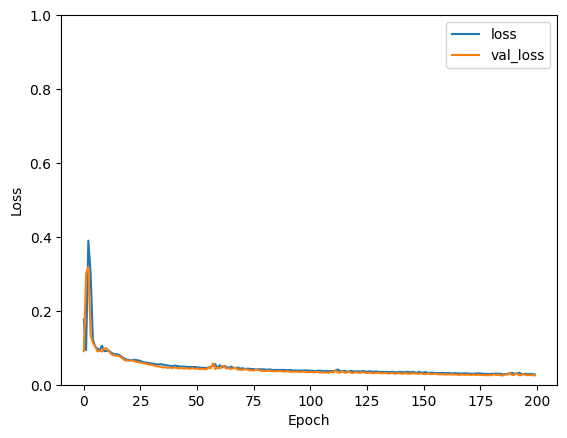

In [16]:
plt.plot(range(200),result.history['loss'], label='loss')
plt.plot(range(200), result.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='best')
plt.show()

In [21]:
y_pred = model.predict(x_test)
y_pred = pd.DataFrame(y_pred)

20/20 [==============================] - 0s 7ms/step


In [ ]:
y_pred = model.predict(x_test)
y_pred = pd.DataFrame(y_pred, index=x_test.index)
y_test = pd.DataFrame(y_test, index=x_test.index)

y_test.iloc[:, 0]

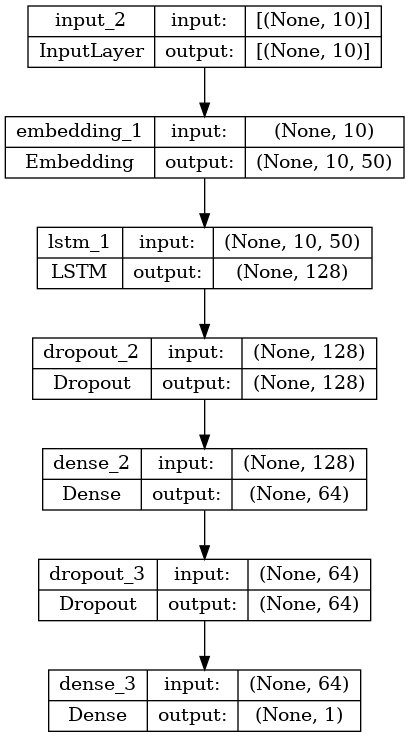

In [7]:
from keras.utils import plot_model
model = keras.models.Sequential([
            keras.layers.Input(shape=(x_train.shape[1],)),
            keras.layers.Embedding(input_dim=21, input_length=10, output_dim=50),

            keras.layers.LSTM(128, return_sequences=False, input_shape=(10,21)),
            keras.layers.Dropout(0.5),

            # keras.layers.LSTM(128, return_sequences=False),
            # keras.layers.Dropout(hp.Float('dropout_2', 0, 0.8, step=0.00005)),

            keras.layers.Dense(64),
            # keras.layers.LeakyReLU(alpha=hp.Float('alpha_leaky', 0, 0.8, step=0.00005)),

            keras.layers.Dropout(0.5),
            keras.layers.Dense(1)
        ])

plot_model(model, show_shapes=True, show_layer_names=True)

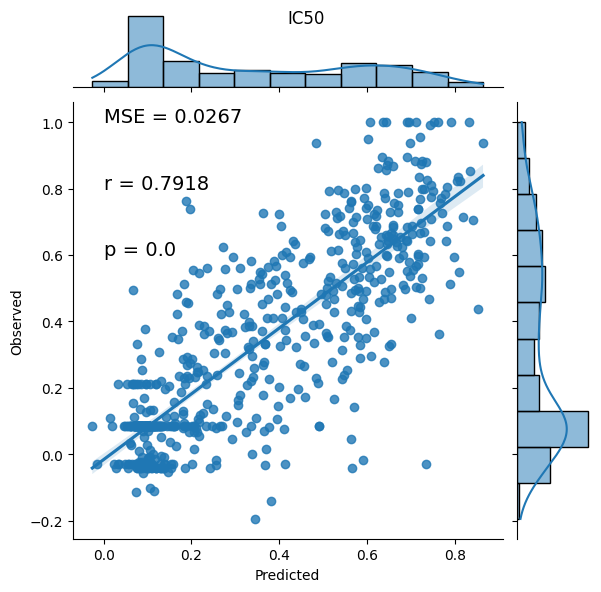

In [22]:
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error

jp = sns.jointplot(x=y_pred.iloc[:, 0], y=y_test.iloc[:, 0], kind='reg')
jp.fig.suptitle('IC50')
jp.ax_joint.set_xlabel('Predicted')
jp.ax_joint.set_ylabel('Observed')
prCor, pCor = spearmanr(y_pred, y_test)
mse = round(mean_squared_error(y_pred, y_test),4)
jp.ax_joint.text(0,1,"MSE = " + str(mse), fontsize=14)
jp.ax_joint.text(0,0.8,"r = " + str(round(prCor,4)), fontsize=14)
jp.ax_joint.text(0,0.6,"p = " + str(round(pCor,2)), fontsize=14)

# # Set the figure size
# jp.figure.set_size_inches(0.001, 0.25)

plt.show()

In [ ]:
tuner = kt.Hyperband(model_builder, objective='val_accuracy', max_epochs=30, factor=3, directory='tuner_results', project_name='poshap_tuner')

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
tuner.search(x_train, y_train, epochs=30, validation_split=0.2, callbacks=[stop_early])

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=30, validation_split=0.2)

In [ ]:
plt.plot(range(1, 31) ,history.history['accuracy'], label='accuracy')
plt.plot(range(1, 31), history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='best')
plt.show()

In [ ]:
plt.plot(range(1, 31) ,history.history['loss'], label='loss')
plt.plot(range(1, 31), history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='best')
plt.show()

In [ ]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),
    keras.layers.Embedding(input_dim=21, output_dim=50),

    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.Dropout(0.0565),

    keras.layers.LSTM(128, return_sequences=False),
    keras.layers.Dropout(0.017),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.LeakyReLU(alpha=0.15),

    keras.layers.Dropout(0.137),
    keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
y_pred = model.predict(x_test)

y_pred = pd.DataFrame(y_pred)

In [ ]:
y_pred.iloc[:, 0].describe()

In [ ]:
y_train.iloc[:, 0].describe()

In [ ]:
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error

jp = sns.jointplot(x=y_pred.iloc[:, intensity], y=y_test.iloc[:, intensity], kind='reg')
jp.fig.suptitle('A001')
jp.ax_joint.set_xlabel('Predicted')
jp.ax_joint.set_ylabel('Observed')
prCor, pCor = spearmanr(y_pred.iloc[:, intensity], y_test.iloc[:, intensity])
mse = round(mean_squared_error(y_pred.iloc[:, intensity], y_test.iloc[:, intensity]),4)
jp.ax_joint.text(0,6,"MSE = " + str(mse), fontsize=14)
jp.ax_joint.text(0,5,"r = " + str(round(prCor,4)), fontsize=14)
jp.ax_joint.text(0,4,"p = " + str(round(pCor,2)), fontsize=14)
plt.show()

In [ ]:
mse = np.mean((y_test - y_pred) ** 2)
print(f"Mean Squared Error (MSE): {mse:.4f}")

In [ ]:
from scipy.stats import spearmanr

rho, p_value = spearmanr(y_test, y_pred)
print(f"Spearman's Rank Correlation Coefficient: {rho}")
print(f"P-value: {p_value}")

sns.heatmap(rho, annot=True, cmap='coolwarm', cbar=False, square=True)
plt.title('Spearman’s Rank Correlation Heatmap')
plt.show()

Create position by one-hot encoding

In [ ]:
for i in range(10):
    for pos in input_dict:
        x_train['{i}.{pos}'.format(i=i, pos=pos)] = [1 if i == input_dict[pos] else 0 for i in x_train[i]]
    x_train.drop(i, axis=1, inplace=True)

x_train.head(10)

In [ ]:
import shap
shap.initjs()

In [ ]:
samp = shap.sample(x_train, 100)
explainer = shap.KernelExplainer(model.predict, samp)
shap_values = explainer.shap_values(X=x_test.iloc[0:100, :], nsamples=100)

In [ ]:
np.shape(shap_values)

In [ ]:
intensity = 0

In [ ]:
shap.initjs()

shap.summary_plot(shap_values=shap_values[:, :, intensity], features=x_test.iloc[0:100, :], title='A001 SHAP by position')

In [ ]:
shap.initjs()

input_array = [list(input_dict.keys())[int(key)] for key in x_test.iloc[0]]
print(''.join(input_array))

shap.force_plot(
    base_value=explainer.expected_value[intensity],
    shap_values=shap_values[0][:, intensity],
    features=x_test.iloc[0 : 0 + 1, :],
    feature_names=[list(input_dict.keys())[int(key)] for key in x_test.iloc[0]],
)

In [ ]:
# TODO: Calculate SHAP on each AA
# Already got SHAP of each pos 
# Browse through each record, identify which AA is present at each position -> The SHAP of that pos is 1 point of that AA
# Append to a matrix, which [pos][AA] calculate the mean

# At first, do it in 1 output only

# Init AA array
aa = [[0.0, 0] for _ in range(21)]

# Init pos array (3d)
pos = [[[0.0, 0] for _ in range(21)] for _ in range(10)]

# Start browsing through SHAP value
for i in range(100):
    input_array = [list(input_dict.keys())[int(key)] for key in x_test.iloc[i]]
    print(''.join(input_array))
    shap_values_single = explainer.shap_values(X=x_test.iloc[i : i + 1, :], nsamples=100)
    pos_index = 0
    for value in shap_values_single[0, :, intensity]:
        pos[pos_index][input_dict.get(input_array[pos_index])][0] += value
        pos[pos_index][input_dict.get(input_array[pos_index])][1] += 1
        pos_index += 1


In [ ]:
pos = [[value[0]/(value[1] if value[1] != 0 else 1) for value in pos[i]] for i in range(10)]

In [ ]:
pd.DataFrame(pos)

plt.figure(figsize=(15, 6))
ax = sns.heatmap(pos, cmap='viridis', center=0, annot=True, fmt= '.1g',)

current_labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = [list(input_dict.keys())[int(label)] for label in current_labels]
ax.set_xticklabels(new_labels)

plt.show()

In [ ]:
shap_values_single = explainer.shap_values(X=samp.iloc[0 : 0 + 1, :], nsamples=100)
shap_values_single[0, :, 0]

In [ ]:
shap_values_single = explainer.shap_values(X=samp.iloc[0:1, :], nsamples=100)
shap_values[0, :, 0]